# Project One - Fantastic Four

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
titles = {"IT.CEL.SETS.P2":"mobile phone subscriptions per 100 people",
"EG.ELC.ACCS.ZS":"Access to electricity (% of population)",
"IQ.CPA.PROP.XQ":"CPIA property rights and rule-based governance rating (1=low to 6=high)"}
#1990:2017 data
indicators = pd.read_pickle('data/indicators.pkl')
indicators['Year'] = pd.to_numeric(indicators['Year'])
df_allData = pd.read_pickle('data/df_allData.pkl')

In [21]:
indicators.sort_values(['Year']).head()
#sns.scatterplot(indicators['Year'],indicators['EG.ELC.ACCS.ZS'])

,ISO,Year,IT.CEL.SETS.P2,EG.ELC.ACCS.ZS,IQ.CPA.PROP.XQ
3,AFG,2014,56.191333,89.500000,1.5
3839,NRU,2014,NaN,99.172058,None
3867,NPL,2014,81.280740,84.900000,3
3895,NLD,2014,115.824428,100.000000,None
3923,NCL,2014,91.564123,100.000000,None


In [10]:
df_allData.head()

,Country/Region/World,ISO,Sex,Year,Age-standardised diabetes prevalence,Lower 95% uncertainty interval,Upper 95% uncertainty interval,Mean BMI,Mean BMI lower 95% uncertainty interval,Mean BMI upper 95% uncertainty interval,...,Prevalence of BMI >=40 kg/m² upper 95% uncertainty interval,Mean systolic blood pressure (mmHg),Mean systolic blood pressure lower 95% uncertainty interval (mmHg),Mean systolic blood pressure upper 95% uncertainty interval (mmHg),Mean diastolic blood pressure (mmHg),Mean diastolic blood pressure lower 95% uncertainty interval (mmHg),Mean diastolic blood pressure upper 95% uncertainty interval (mmHg),Prevalence of raised blood pressure,Prevalence of raised blood pressure lower 95% uncertainty interval,Prevalence of raised blood pressure upper 95% uncertainty interval
0,Afghanistan,AFG,Men,1980,0.044712,0.015339,0.094918,19.532923,17.107774,22.010869,...,0.000069,121.779978,113.210227,130.192427,76.662263,71.161397,82.116525,0.259259,0.165976,0.370139
1,Afghanistan,AFG,Men,1981,0.046114,0.016883,0.093777,19.637998,17.232367,22.088491,...,0.000076,121.924842,113.644684,130.108549,76.753616,71.390596,82.029064,0.261067,0.170775,0.367569
2,Afghanistan,AFG,Men,1982,0.047601,0.018745,0.094018,19.741670,17.357383,22.164497,...,0.000083,122.073346,113.918442,130.066324,76.846447,71.554908,81.950016,0.262912,0.174699,0.364517
3,Afghanistan,AFG,Men,1983,0.049173,0.020375,0.093950,19.843253,17.486672,22.266846,...,0.000093,122.224822,114.322121,130.152197,76.939638,71.770334,81.920172,0.264802,0.178516,0.363599
4,Afghanistan,AFG,Men,1984,0.050834,0.022269,0.093679,19.943436,17.650170,22.328421,...,0.000104,122.376956,114.549692,130.312049,77.032372,71.954991,81.872425,0.266719,0.181058,0.362819


In [11]:
df_tmp = df_allData.groupby(['Year']).get_group(2014)


In [12]:
df_tmp = df_tmp.groupby('Sex').get_group('Men')

In [13]:
df_tmp = df_tmp[['ISO','Age-standardised diabetes prevalence','Mean BMI']]

In [14]:
indicators = indicators.groupby('Year').get_group(2014)

In [15]:
df_tmp = df_tmp.merge(indicators,on='ISO')

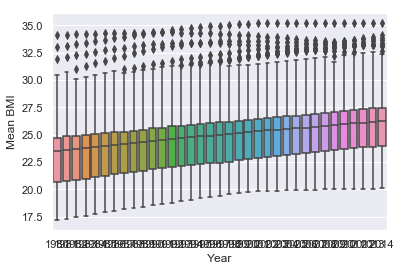

In [19]:
sns.boxplot(df_allData['Year'],df_allData['Mean BMI'],orient='v')

Text(0.5, 1.0, '2014 - mobile phone subscriptions per 100 people')

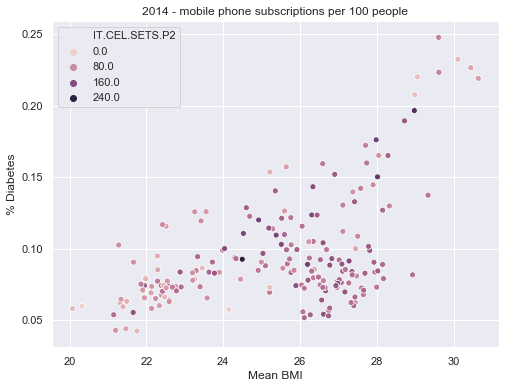

In [11]:
fig, axes = plt.subplots(figsize=(8,6))
sns.scatterplot(ax=axes,legend='brief', x="Mean BMI",y="Age-standardised diabetes prevalence",
                hue="IT.CEL.SETS.P2",data=df_tmp)
plt.ylabel("% Diabetes")
plt.title(f"2014 - {titles['IT.CEL.SETS.P2']}")


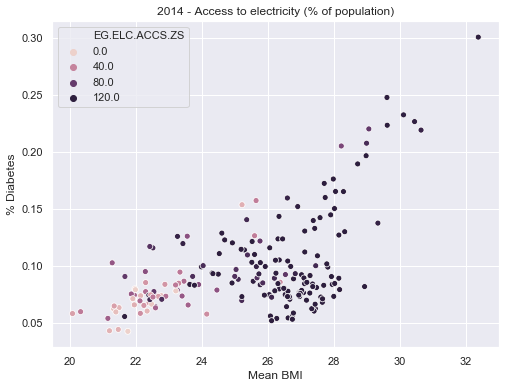

In [12]:
fig, axes = plt.subplots(figsize=(8,6))
sns.scatterplot(ax=axes,legend="brief", x="Mean BMI",y="Age-standardised diabetes prevalence",
                hue="EG.ELC.ACCS.ZS",data=df_tmp)
plt.ylabel("% Diabetes")
plt.title(f"2014 - {titles['EG.ELC.ACCS.ZS']}")

In [13]:
df_tmp['IQ.CPA.PROP.XQ']=df_tmp['IQ.CPA.PROP.XQ'].replace(r'\s+',np.nan, regex=True)

In [14]:
df_tmp['IQ.CPA.PROP.XQ'].head()

0    1.5
1    NaN
2    NaN
3    NaN
4    NaN
Name: IQ.CPA.PROP.XQ, dtype: float64

Text(0.5, 1.0, '2014 - CPIA property rights and rule-based governance rating (1=low to 6=high)')

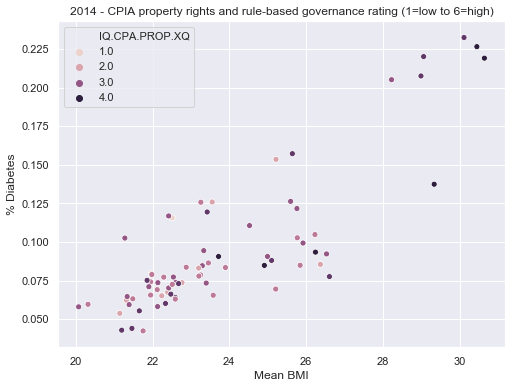

In [15]:
fig, axes = plt.subplots(figsize=(8,6))
sns.scatterplot(ax=axes, legend="brief", x="Mean BMI",y="Age-standardised diabetes prevalence",
                hue="IQ.CPA.PROP.XQ",data=df_tmp)
plt.ylabel("% Diabetes")
plt.title(f"2014 - {titles['IQ.CPA.PROP.XQ']}")

In [35]:
hdi = pd.read_csv('data/Human development index (HDI).csv',encoding='iso-8859-1',)


In [36]:
hdi.columns

Index(['HDI Rank (2017)', 'Country', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [42]:
hdi['Country'] = hdi['Country'].apply(str.strip)

In [43]:
hdi.sort_values('Country', inplace=True)

In [44]:
codes = pd.read_csv('data/countries_codes_and_coordinates.csv')

In [46]:
codes=codes[['Country', 'Alpha-3 code']]

In [47]:
codes.shape

(256, 2)

In [50]:
hdi = hdi.merge(codes, on='Country')

In [90]:
hdi_years = [ '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017']
hdi_col = hdi.melt(value_vars= hdi_years, id_vars=['Country','Alpha-3 code','HDI Rank (2017)'])

In [91]:
hdi_col.columns=['Country','ISO','HDIrank2017','Year','HDIvalue']

In [109]:
hdi_quint = {}

for y in hdi_years:
    #print(type(y))
    tmp = hdi_col.groupby(['Year']).get_group(y)
    tmp = tmp[['HDIvalue']]
    tmp.columns=[f'HDI {y}']
    hdi_quint[y] = tmp.sort_values(f'HDI {y}',ascending=True).quantile([0.2,0.4,0.6, 0.8])
    
hdi_quint['1990']

,HDI 1990
0.2,0.4126
0.4,0.5804
0.6,0.6712
0.8,0.7448


In [110]:

for y in hdi_years:
    hdi_quint[y]['bin']= 10 * (hdi_quint[y].index) / 2
    print(hdi_quint[y])

     HDI 1990  bin
0.2    0.4126  1.0
0.4    0.5804  2.0
0.6    0.6712  3.0
0.8    0.7448  4.0
     HDI 1991  bin
0.2    0.4182  1.0
0.4    0.5846  2.0
0.6    0.6660  3.0
0.8    0.7486  4.0
     HDI 1992  bin
0.2     0.414  1.0
0.4     0.587  2.0
0.6     0.664  3.0
0.8     0.753  4.0
     HDI 1993  bin
0.2    0.4212  1.0
0.4    0.5890  2.0
0.6    0.6694  3.0
0.8    0.7632  4.0
     HDI 1994  bin
0.2    0.4242  1.0
0.4    0.5950  2.0
0.6    0.6710  3.0
0.8    0.7678  4.0
     HDI 1995  bin
0.2    0.4280  1.0
0.4    0.5988  2.0
0.6    0.6730  3.0
0.8    0.7720  4.0
     HDI 1996  bin
0.2    0.4346  1.0
0.4    0.6068  2.0
0.6    0.6788  3.0
0.8    0.7768  4.0
     HDI 1997  bin
0.2    0.4432  1.0
0.4    0.6134  2.0
0.6    0.6866  3.0
0.8    0.7788  4.0
     HDI 1998  bin
0.2    0.4512  1.0
0.4    0.6178  2.0
0.6    0.6918  3.0
0.8    0.7866  4.0
     HDI 1999  bin
0.2    0.4450  1.0
0.4    0.6062  2.0
0.6    0.6866  3.0
0.8    0.7894  4.0
     HDI 2000  bin
0.2    0.4496  1.0
0.4    0.611

In [83]:
hdi_1990['HDIvalue']

4524    0.494
4525    0.782
4526    0.753
4527    0.856
4528    0.577
4529    0.778
4530    0.822
4531    0.749
4532    0.938
4533    0.906
4534    0.757
4535    0.806
4536    0.846
4537    0.597
4538    0.799
4539    0.805
4540    0.915
4541    0.709
4542    0.512
4543    0.609
4544    0.766
4545    0.712
4546    0.758
4547    0.852
4548    0.810
4549    0.420
4550    0.418
4551    0.576
4552    0.553
4553    0.922
        ...  
4668    0.543
4669    0.696
4670    0.889
4671    0.768
4672    0.499
4673    0.719
4674    0.932
4675    0.943
4676    0.536
4677    0.647
4678    0.748
4679    0.631
4680    0.500
4681    0.724
4682    0.785
4683    0.732
4684    0.787
4685    0.705
4686    0.508
4687    0.746
4688    0.862
4689    0.920
4690    0.922
4691    0.802
4692    0.703
4693    0.600
4694    0.689
4695    0.462
4696    0.586
4697    0.532
Name: HDIvalue, Length: 174, dtype: float64

- HDI quintiles over time
- HDI quintile factor added to groups
- 